# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

In [1]:
# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [25]:
#!pip install pmdarima

In [1]:
from datafromsource import DataFromSource
import talib as ta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA


In [3]:
aapl = DataFromSource('AAPL.O')
df = aapl.get_prices()
df

AAPL.O,AAPL.O
Date,
2024-10-07,221.69
2024-10-08,225.77
2024-10-09,229.54
2024-10-10,229.04
2024-10-11,227.55
...,...
2025-09-30,254.63
2025-10-01,255.45
2025-10-02,257.13


## ARIMA

In [31]:
import yfinance as yf

# Download data
gs = yf.download("GS", start="2011-01-01", end="2021-01-01")

ModuleNotFoundError: No module named 'yfinance'

In [27]:
# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(df["AAPL.O"], seasonal=False, trace=True)
print(model.summary())

/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132:FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132:FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132:FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132:FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132:FutureWarning: 'force_all_finite' was renamed to 'ensure_all_fin

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1431.560, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1433.008, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1433.718, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1433.970, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1431.223, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1435.015, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.210 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -714.611
Date:                Sat, 04 Oct 2025   AIC                           1431.223
Time:                        15:46:37   BIC                           1434.740
Sample:                             0   HQIC                          1432.639
          

In [29]:
# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
X = df["AAPL.O"].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    history.append(obs)

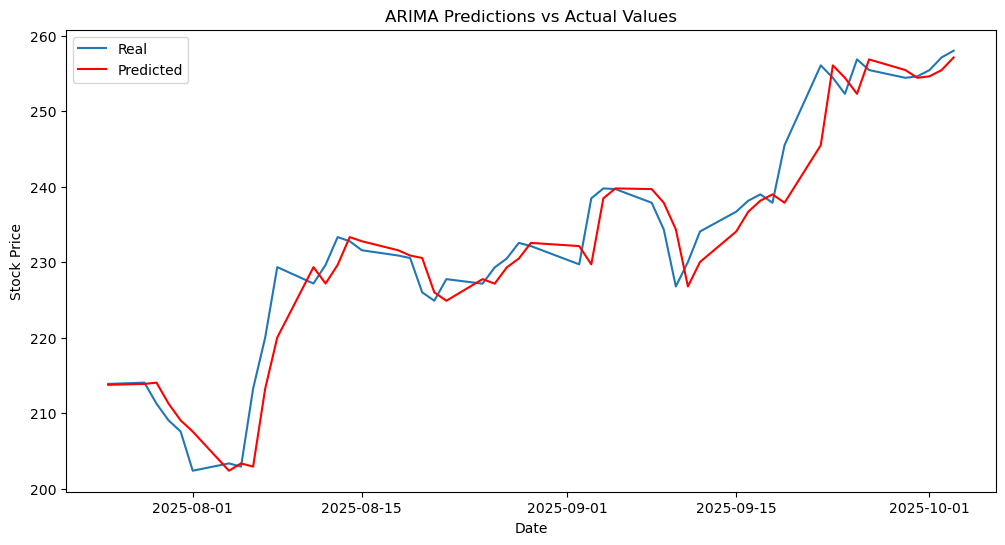

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(df.iloc[size:,:].index, test, label='Real')
plt.plot(df.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Fourier Transform

In [4]:
close_fft = np.fft.fft(np.asarray(df["AAPL.O"].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))


/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/matplotlib/cbook.py:1719:ComplexWarning: Casting complex values to real discards the imaginary part
/Users/neftalivaldez/miniforge3/envs/lseg/lib/python3.11/site-packages/matplotlib/cbook.py:1355:ComplexWarning: Casting complex values to real discards the imaginary part


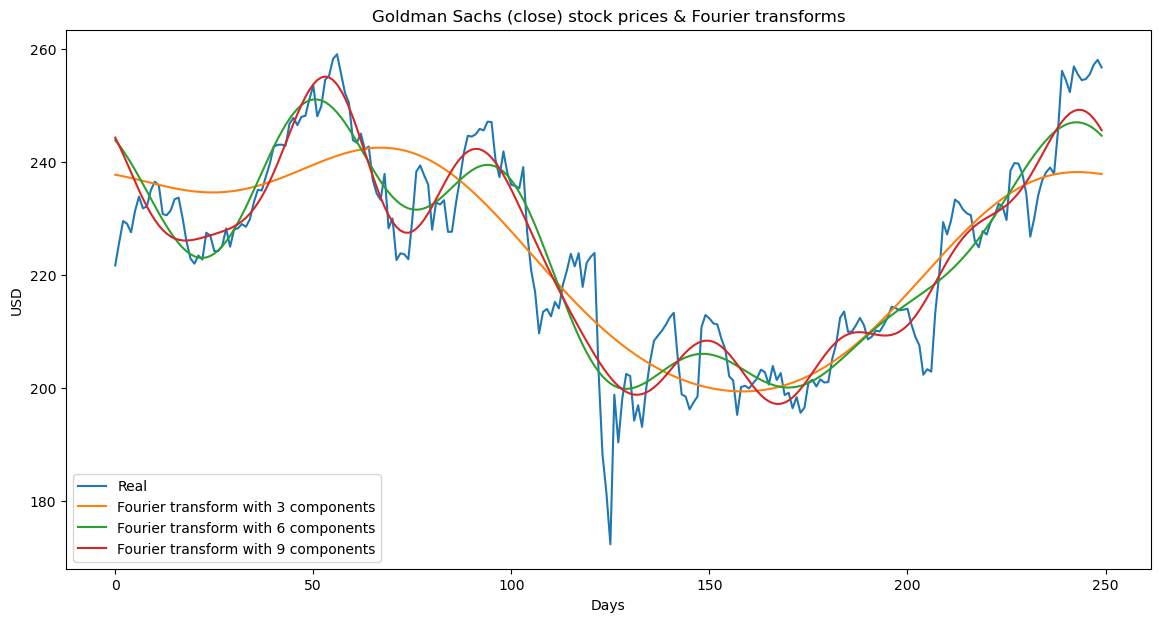

In [5]:
                # Calculate the Fourier Transform

# Plot the Fourier Transforms
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(np.asarray(df["AAPL.O"].tolist()),  label='Real')
for num_ in [3, 6, 9]:
    fft_list_m10= np.copy(close_fft); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Goldman Sachs (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

Bibliografía: 

Predicting Stock Prices: using ARIMA, Fourier Transformation and Deep Learning
shikhar kanaskar, Mar 12, 2023
https://medium.com/@shikharkanaskar97/predicting-stock-prices-using-arima-fourier-transformation-and-deep-learning-e5fb4f693c85
